In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

Variables:
- Id: Id de la película
- popularity: Índice de popularidad de la película calculado semanalmente
- budget: El presupuesto para la película.
- revenue: El ingreso de la película.
- original_title: El título original de la película, en su idioma original.
- originalLanguage: Idioma original en que se encuentra la película
- title: El título de la película traducido al inglés
- homePage: La página de inicio de la película
- video: Si tiene videos promocionales o no
- director: Director de la película
- runtime: La duración de la película.
- genres: El género de la película.
- genresAmount: Cantidad de géneros que representan la película
- productionCompany: Las compañías productoras de la película.
- productionCoAmount: Cantidad de compañías productoras que participaron en la película
- productionCompanyCountry: Países de las compañías productoras de la película
- productionCountry: Países en los que se llevó a cabo la producción de la película
- productionCountriesAmount: Cantidad de países en los que se rodó la película
- releaseDate: Fecha de lanzamiento de la película
- voteCount: El número de votos en la plataforma para la película.
- voteAvg: El promedio de los votos en la plataforma para la película
- actors: Actores que participan en la película (Elenco)
- actorsPopularity: Índice de popularidad del elenco de la película.
- actorsCharacter: Personaje que interpreta cada actor en la película
- actorsAmount: Cantidad de personas que actúan en la película
- castWomenAmount: Cantidad de actrices en el elenco de la película
- castMenAmount: Cantidad de actores en el elenco de la película.

In [2]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

In [3]:
archivo_csv = "movies.csv"
datos = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

# 1. ¿Cuáles son las 10 películas que contaron con más presupuesto? #

In [4]:
datos['budget'] = pd.to_numeric(datos['budget'], errors='coerce')
top_10_presupuesto = datos.sort_values(by='budget', ascending=False).head(10)
print(top_10_presupuesto[['id','title', 'budget']])

          id                                        title     budget
716     1865  Pirates of the Caribbean: On Stranger Tides  380000000
4710   99861                      Avengers: Age of Ultron  365000000
5952  299534                            Avengers: Endgame  356000000
5953  299536                       Avengers: Infinity War  300000000
163      285     Pirates of the Caribbean: At World's End  300000000
4953  141052                               Justice League  300000000
607     1452                             Superman Returns  270000000
3791   38757                                      Tangled  260000000
7134  420818                                The Lion King  260000000
280      559                                 Spider-Man 3  258000000


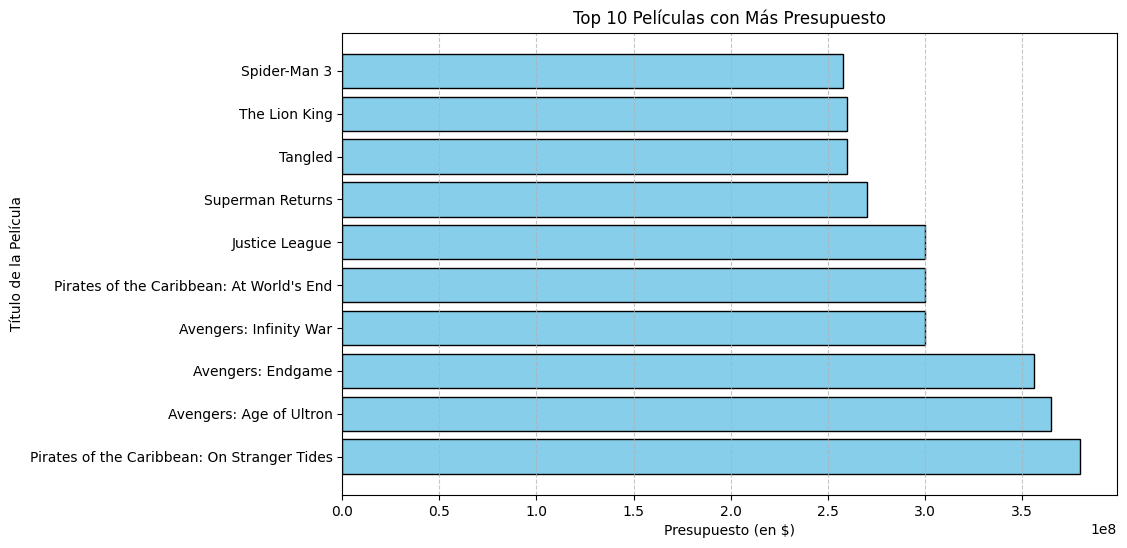

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_presupuesto['originalTitle'], top_10_presupuesto['budget'], color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 10 Películas con Más Presupuesto')
plt.xlabel('Presupuesto (en $)')
plt.ylabel('Título de la Película')

# Mostrar la gráfica
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 2. ¿Cuáles son las 10 películas que más ingresos tuvieron? #

In [8]:
datos['revenue'] = pd.to_numeric(datos['revenue'], errors='coerce')


top_10_presupuesto = datos.sort_values(by='revenue', ascending=False).head(10)

print(top_10_presupuesto[['id','title', 'revenue']])

          id                         title       revenue
3210   19995                        Avatar  2.847246e+09
5952  299534             Avengers: Endgame  2.797801e+09
307      597                       Titanic  2.187464e+09
4947  140607  Star Wars: The Force Awakens  2.068224e+09
5953  299536        Avengers: Infinity War  2.046240e+09
4914  135397                Jurassic World  1.671713e+09
7134  420818                 The Lion King  1.667635e+09
9049  634649       Spider-Man: No Way Home  1.631853e+09
3397   24428                  The Avengers  1.518816e+09
5087  168259                     Furious 7  1.515048e+09


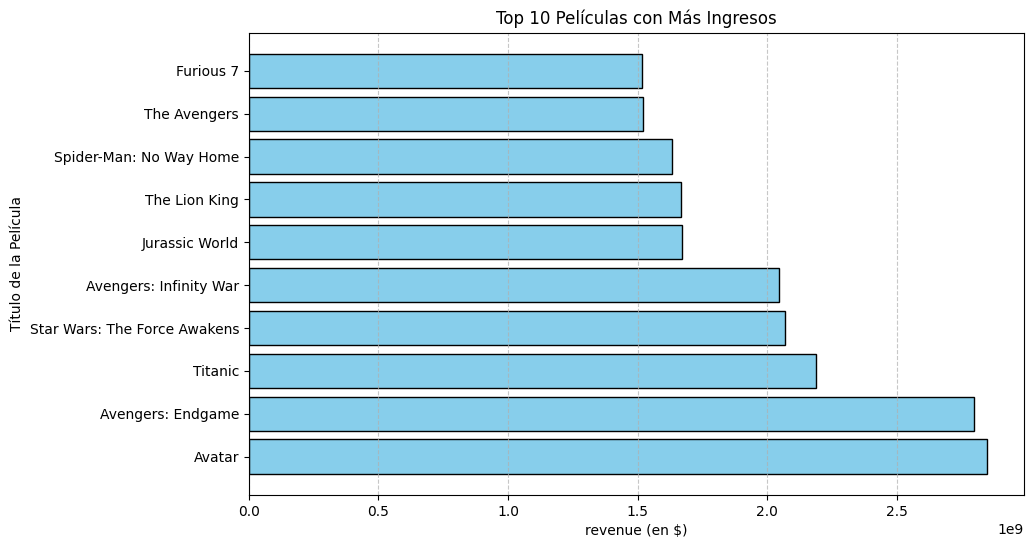

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_presupuesto['title'], top_10_presupuesto['revenue'], color='skyblue', edgecolor='black')

plt.title('Top 10 Películas con Más Ingresos')
plt.xlabel('revenue (en $)')
plt.ylabel('Título de la Película')


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. ¿Cuál es la película que más votos tuvo? #

In [7]:
datos['voteCount'] = pd.to_numeric(datos['voteCount'], errors='coerce')

# Ordenar el DataFrame por 'budget' en orden descendente
Mayor_votos = datos.sort_values(by='voteCount', ascending=False).head(10)
print("La pelicula con mayor votos es: \n")
print(Mayor_votos[['id','title', 'voteCount']])

La pelicula con mayor votos es: 

          id                    title  voteCount
3511   27205                Inception      30788
5027  157336             Interstellar      27644
87       155          The Dark Knight      26690
3397   24428             The Avengers      26215
5889  293660                 Deadpool      26178
3210   19995                   Avatar      24766
4825  118340  Guardians of the Galaxy      23806
5953  299536   Avengers: Infinity War      23715
275      550               Fight Club      23338
374      680             Pulp Fiction      22501


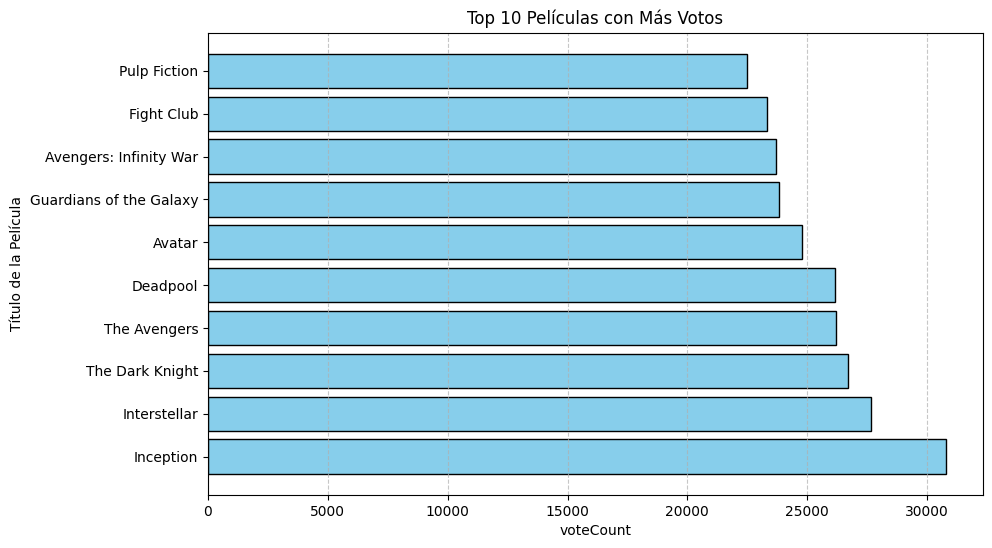

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(Mayor_votos['title'], Mayor_votos['voteCount'], color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 10 Películas con Más Votos')
plt.xlabel('voteCount')
plt.ylabel('Título de la Película')

# Mostrar la gráfica
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios? #

In [12]:
datos['voteCount'] = pd.to_numeric(datos['voteCount'], errors='coerce')
peor_pelicula = (datos.sort_values(by='voteAvg', ascending=True).head(1))
print("La peor pelicula de acuerdo a los votos de todos los usuarios es: \n")
print(peor_pelicula[['id','voteAvg', 'title']])

La peor pelicula de acuerdo a los votos de todos los usuarios es: 

          id  voteAvg                                              title
9786  820530      1.3  DAKAICHI -I'm Being Harassed by the Sexiest Ma...


# 5. ¿Cuántas películas se hicieron en cada año?  #

In [13]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')
datos['releaseYear'] = datos['releaseDate'].dt.year
peliculas_tiempo = datos['releaseYear'].value_counts().sort_index()
print(peliculas_tiempo)

releaseYear
1902      1
1920      1
1921      1
1922      1
1925      2
1926      1
1927      2
1929      1
1930      1
1931      4
1932      1
1933      1
1935      1
1936      1
1937      1
1938      1
1939      4
1940      7
1941      4
1942      4
1943      2
1944      4
1946      4
1947      4
1948      7
1949      3
1950      4
1951      6
1952      8
1953     13
1954     11
1955      7
1956     11
1957     15
1958      9
1959     12
1960      9
1961     10
1962     13
1963     16
1964     10
1965      8
1966     13
1967     16
1968     15
1969     11
1970     12
1971     16
1972     13
1973     19
1974     16
1975     16
1976     18
1977     21
1978     22
1979     20
1980     20
1981     30
1982     35
1983     28
1984     41
1985     47
1986     48
1987     53
1988     59
1989     59
1990     47
1991     50
1992     63
1993     83
1994     65
1995     79
1996     76
1997     84
1998     92
1999     97
2000    132
2001    176
2002    185
2003    199
2004    229
2005    245
2006

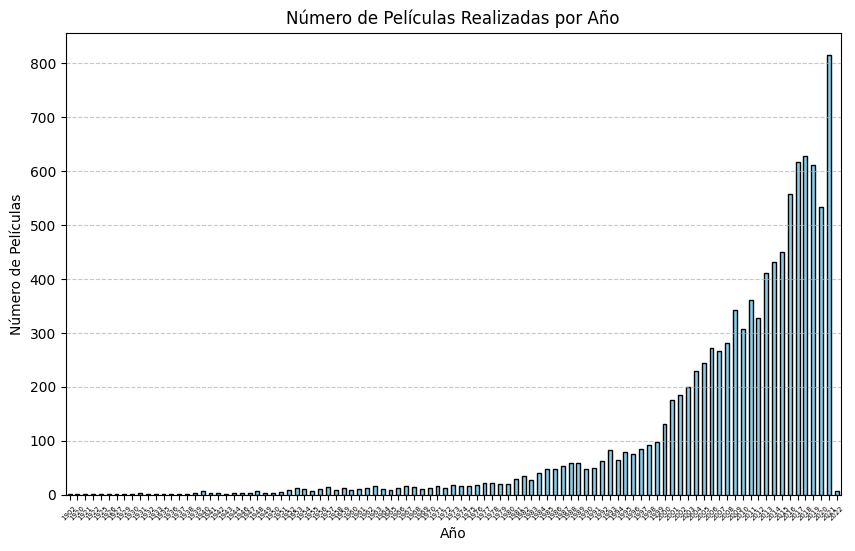

In [14]:
plt.figure(figsize=(10, 6))
peliculas_tiempo.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Número de Películas Realizadas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45, fontsize=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# 6. ¿Cuál es el género principal de las 20 películas más recientes?  #

In [15]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')
datos['releaseYear'] = datos['releaseDate'].dt.year
peliculas_tiempo = datos.sort_values(by='releaseYear', ascending=False).head(20)

peliculas_tiempo['genres'] = peliculas_tiempo['genres'].str.split('|').str[0]

genero_principal = peliculas_tiempo['genres'].mode()[0]

print(f'El género principal de las 20 películas más recientes es: {genero_principal}')

El género principal de las 20 películas más recientes es: Comedy


##### ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. #####

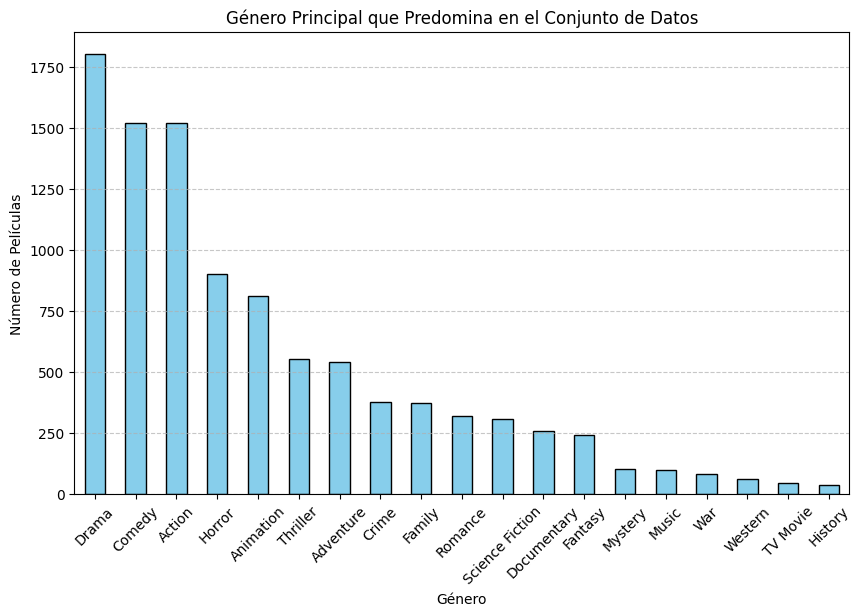

In [16]:
datos['genres'] = datos['genres'].str.split('|').str[0]

generos_frecuencia = datos['genres'].value_counts()

plt.figure(figsize=(10, 6))
generos_frecuencia.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Género Principal que Predomina en el Conjunto de Datos')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### 1. ¿A qué género principal pertenecen las películas más largas? #####

In [17]:
datos['runtime'] = pd.to_numeric(datos['runtime'], errors='coerce')
peliculas_largas = datos.sort_values(by='runtime', ascending=False)

peliculas_largas['genres'] = peliculas_largas['genres'].str.split('|').str[0]

genero_largas = peliculas_largas['genres'].mode()[0]

print(f'El género principal de las películas más largas es: {genero_largas}')


El género principal de las películas más largas es: Drama


# 7. ¿Las películas de qué genero principal obtuvieron mayores ganancias?
#

In [18]:
datos['revenue'] = pd.to_numeric(datos['revenue'], errors='coerce')
datos['budget'] = pd.to_numeric(datos['budget'], errors='coerce')

datos["ganancias"] = datos['revenue'] - datos['budget']

datos['genres'] = datos['genres'].str.split('|').str[0]

genero_ganancias = datos.groupby('genres')['ganancias'].sum().sort_values(ascending=False)

genero_mayores_ganancias = genero_ganancias.idxmax()
ganancia_maxima = genero_ganancias.max()
print(f'El género principal con mayores ganancias es: {genero_mayores_ganancias} con una ganancia total de {ganancia_maxima}')

El género principal con mayores ganancias es: Action con una ganancia total de 92276183898.0


# 8. ¿La cantidad de actores influye en los ingresos de las películas? ¿se han hecho películas con más actores en los últimos años? # 

La correlación entre la cantidad de actores y los ingresos es: -0.0196
por lo tanto la cantidad de actores no influye en las ganancias de la pelicula.


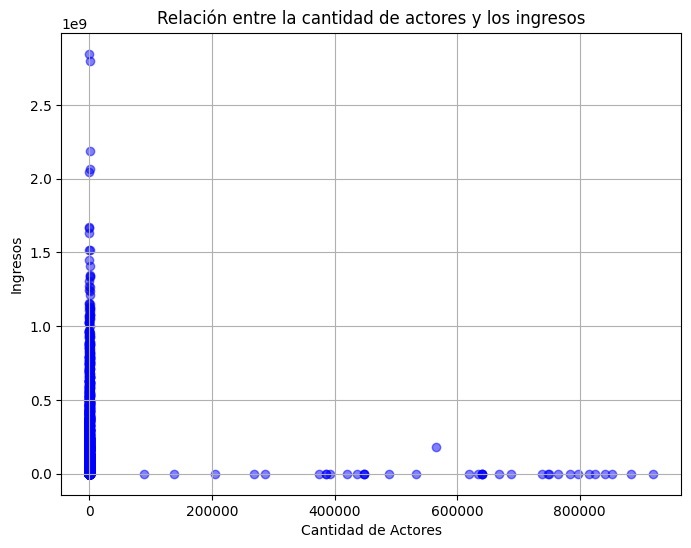

In [19]:
# Asegurarse de que 'actorsAmount' y 'revenue' estén en formato numérico
datos['actorsAmount'] = pd.to_numeric(datos['actorsAmount'], errors='coerce')
datos['revenue'] = pd.to_numeric(datos['revenue'], errors='coerce')

correlacion = datos[['actorsAmount', 'revenue']].corr().iloc[0, 1]

print(f'La correlación entre la cantidad de actores y los ingresos es: {correlacion:.4f}')
print("por lo tanto la cantidad de actores no influye en las ganancias de la pelicula.")

plt.figure(figsize=(8, 6))
plt.scatter(datos['actorsAmount'], datos['revenue'], alpha=0.5, color='blue')
plt.title('Relación entre la cantidad de actores y los ingresos')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()


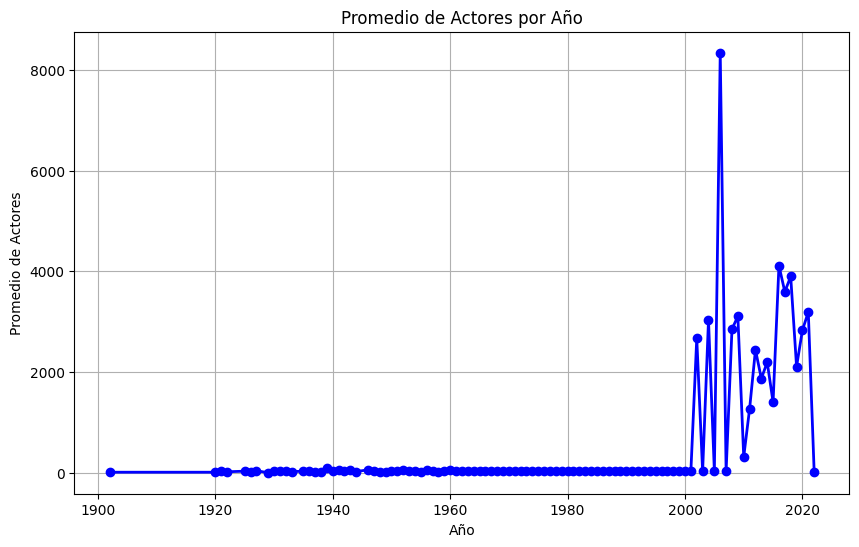

A comparacion de años anteriores, a partir del 2000 se vio un incremento en la cantidad de actores que actuaban en peliculas


In [20]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')

datos['year'] = datos['releaseDate'].dt.year

promedio_actores_por_anio = datos.groupby('year')['actorsAmount'].mean()


plt.figure(figsize=(10, 6))
plt.plot(promedio_actores_por_anio, marker='o', linestyle='-', color='blue', linewidth=2)

plt.title('Promedio de Actores por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Actores')
plt.grid(True)
plt.show()

print("A comparacion de años anteriores, a partir del 2000 se vio un incremento en la cantidad de actores que actuaban en peliculas")


# 9. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas? #

Correlación entre mujeres en el reparto y popularidad: -0.0018
Correlación entre mujeres en el reparto y los ingresos: -0.0374
Correlación entre hombres en el reparto y popularidad: 0.0028
Correlación entre hombres en el reparto y los ingresos: -0.0601


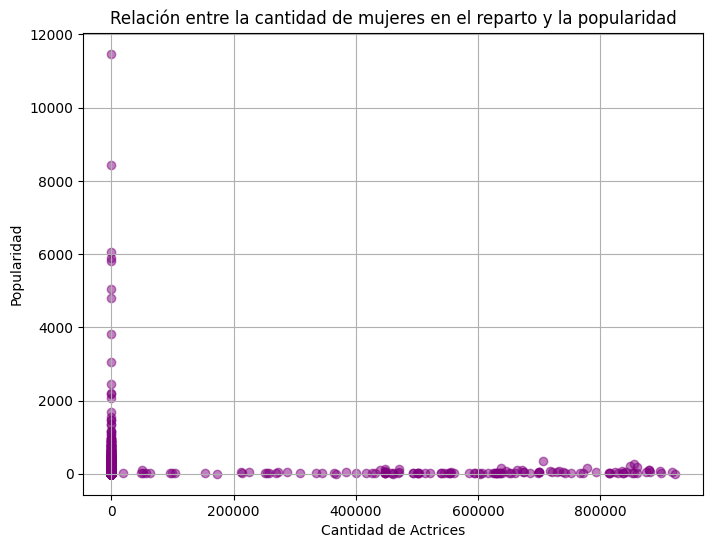

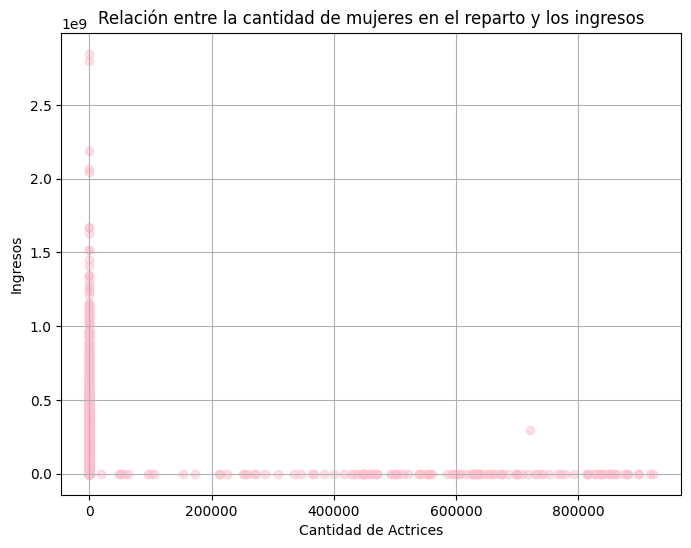

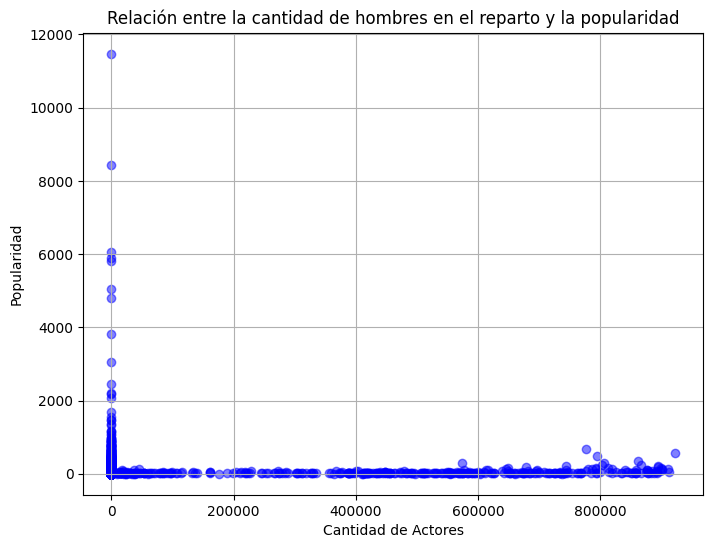

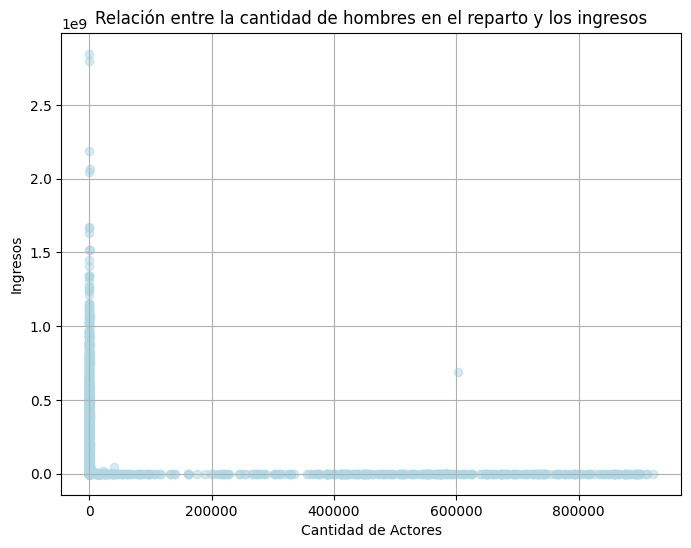

Por lo visto, la cantidad de hombres o mujeres en una pelicula, no tiene un impacto significativo ya sea en los ingresos.
No obstante hay una correlacion positiva entre el reparto de hombres y la popularidad, a diferencia que el de las mujeres que tiene una correlacion negativa.


In [21]:
datos[['castWomenAmount', 'popularity', 'revenue']] = datos[
    ['castWomenAmount', 'popularity', 'revenue']
].apply(pd.to_numeric, errors='coerce')

datos[['castMenAmount', 'popularity', 'revenue']] = datos[
    ['castMenAmount', 'popularity', 'revenue']
].apply(pd.to_numeric, errors='coerce')

correlacion_mujeres_popularity = datos['castWomenAmount'].corr(datos['popularity'])
print(f'Correlación entre mujeres en el reparto y popularidad: {correlacion_mujeres_popularity:.4f}')

correlacion_mujeres_revenue = datos['castWomenAmount'].corr(datos['revenue'])
print(f'Correlación entre mujeres en el reparto y los ingresos: {correlacion_mujeres_revenue:.4f}')

correlacion_hombres_popularity = datos['castMenAmount'].corr(datos['popularity'])
print(f'Correlación entre hombres en el reparto y popularidad: {correlacion_hombres_popularity:.4f}')

correlacion_hombres_revenue = datos['castMenAmount'].corr(datos['revenue'])
print(f'Correlación entre hombres en el reparto y los ingresos: {correlacion_hombres_revenue:.4f}')

# Gráfico: Cantidad de mujeres en el reparto vs. Popularidad
plt.figure(figsize=(8, 6))
plt.scatter(datos['castWomenAmount'], datos['popularity'], alpha=0.5, color='purple')
plt.title('Relación entre la cantidad de mujeres en el reparto y la popularidad')
plt.xlabel('Cantidad de Actrices')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

# Gráfico: Cantidad de mujeres en el reparto vs. Ingresos
plt.figure(figsize=(8, 6))
plt.scatter(datos['castWomenAmount'], datos['revenue'], alpha=0.5, color='pink')
plt.title('Relación entre la cantidad de mujeres en el reparto y los ingresos')
plt.xlabel('Cantidad de Actrices')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Gráfico: Cantidad de hombres en el reparto vs. Popularidad
plt.figure(figsize=(8, 6))
plt.scatter(datos['castMenAmount'], datos['popularity'], alpha=0.5, color='blue')
plt.title('Relación entre la cantidad de hombres en el reparto y la popularidad')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

# Gráfico: Cantidad de hombres en el reparto vs. Ingresos
plt.figure(figsize=(8, 6))
plt.scatter(datos['castMenAmount'], datos['revenue'], alpha=0.5, color='lightblue')
plt.title('Relación entre la cantidad de hombres en el reparto y los ingresos')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

print("Por lo visto, la cantidad de hombres o mujeres en una pelicula, no tiene un impacto significativo ya sea en los ingresos.")
print("No obstante hay una correlacion positiva entre el reparto de hombres y la popularidad, a diferencia que el de las mujeres que tiene una correlacion negativa.")


# 10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?#

In [22]:
datos['voteAvg'] = pd.to_numeric(datos['voteAvg'], errors='coerce')

mejores_calificadas = datos.sort_values(by='voteAvg', ascending=False).head(20)

directores_mejores_calificadas = mejores_calificadas[['director','title', 'voteAvg','id']]
print("Los directores de las 20 películas mejor calificadas son:")
print(directores_mejores_calificadas)


Los directores de las 20 películas mejor calificadas son:
                                    director  \
9875                                     NaN   
9733                          Christin Baker   
8632                            Thomas Coven   
9347                            Kaku Arakawa   
9990                     Miguel Angel Zavala   
9246                           Rebecca Sugar   
9298                       Laurent Bouzereau   
9084              Víctor Barba|Juan Olivares   
6750                                     NaN   
6885  Dave Bullock|Troy Adomitis|Victor Cook   
7453                                     NaN   
7317                                     NaN   
9368                          Won Myeong-jun   
6170                            Samuel Leong   
5528                      Selena Quintanilla   
9783                          Haruo Sotozaki   
9756                          Haruo Sotozaki   
9777                            Igor Kopylov   
8265                         U

# 11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión #

La correlación entre el presupuesto y los ingresos es: 0.7575
A mayor presupuesto es muy probable que se obtengan altos ingresos, como se puede ver en el grafico de dispercion,
 hay muchas peliculas que tienen un alto presupuesto, pero no tienen una gran cantidad de ingresos.


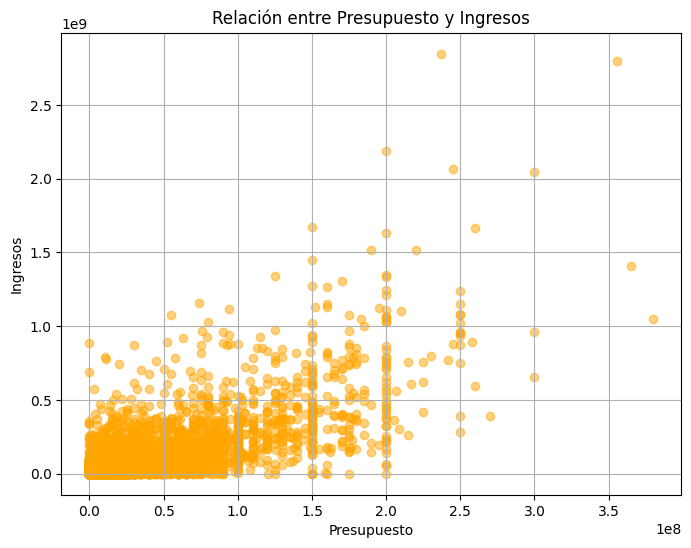

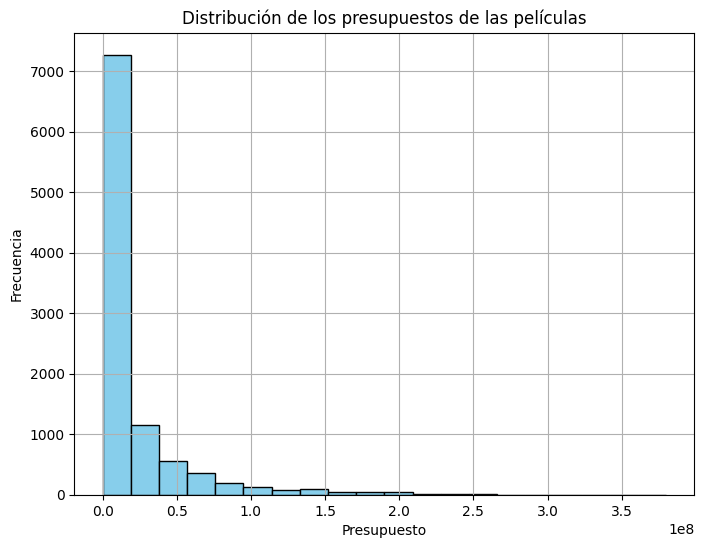

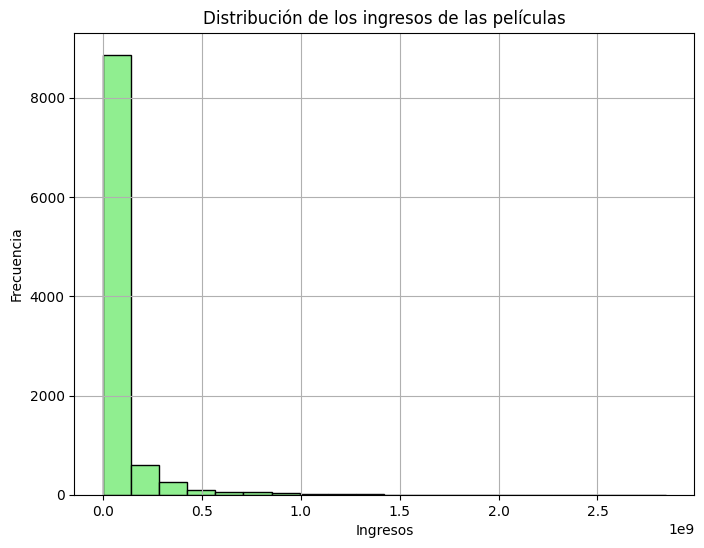

In [23]:
# Asegurarse de que 'budget' y 'revenue' estén en formato numérico
datos['budget'] = pd.to_numeric(datos['budget'], errors='coerce')
datos['revenue'] = pd.to_numeric(datos['revenue'], errors='coerce')

# Calcular la correlación entre presupuesto y los ingresos
c_p_i = datos['budget'].corr(datos['revenue'])
print(f'La correlación entre el presupuesto y los ingresos es: {c_p_i:.4f}')
print("A mayor presupuesto es muy probable que se obtengan altos ingresos, como se puede ver en el grafico de dispercion,\n hay muchas peliculas que tienen un alto presupuesto, pero no tienen una gran cantidad de ingresos.")
# Gráfico de dispersión: Presupuesto vs Ingresos
plt.figure(figsize=(8, 6))
plt.scatter(datos['budget'], datos['revenue'], alpha=0.5, color='orange')
plt.title('Relación entre Presupuesto y Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Histograma del presupuesto
plt.figure(figsize=(8, 6))
plt.hist(datos['budget'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de los presupuestos de las películas')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Histograma de los ingresos
plt.figure(figsize=(8, 6))
plt.hist(datos['revenue'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de los ingresos de las películas')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()




# 12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos? #

Por lo que se observa el en Mayo, Junio y Julio hay mejores ingresos, no obstante se ve que Junio es el mes que mejor ingresos tuvo.
releaseMonth
1     3.377369e+07
2     4.290835e+07
3     5.111594e+07
4     5.259565e+07
5     8.784544e+07
6     9.474711e+07
7     7.602870e+07
8     3.597008e+07
9     3.192892e+07
10    3.898733e+07
11    7.149211e+07
12    7.435888e+07
Name: revenue, dtype: float64


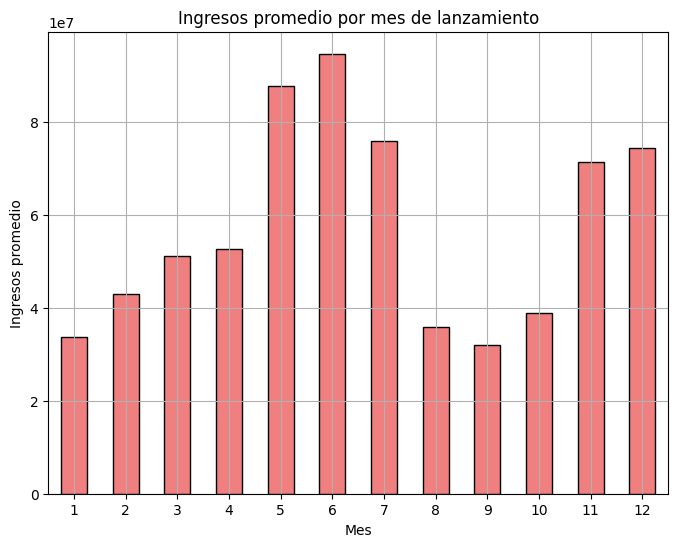

In [24]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')

datos['releaseMonth'] = datos['releaseDate'].dt.month

ingresos_mes = datos.groupby('releaseMonth')['revenue'].mean()

print("Por lo que se observa el en Mayo, Junio y Julio hay mejores ingresos, no obstante se ve que Junio es el mes que mejor ingresos tuvo.")
print(ingresos_mes)

plt.figure(figsize=(8, 6))
ingresos_mes.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Ingresos promedio por mes de lanzamiento')
plt.xlabel('Mes')
plt.ylabel('Ingresos promedio')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


# 13.¿En qué meses se han visto los lanzamientos con mejores ingresos?¿cuantas películas, en promedio, se han lanzado por mes? #

Ingresos promedio por mes:
 releaseMonth
1     3.377369e+07
2     4.290835e+07
3     5.111594e+07
4     5.259565e+07
5     8.784544e+07
6     9.474711e+07
7     7.602870e+07
8     3.597008e+07
9     3.192892e+07
10    3.898733e+07
11    7.149211e+07
12    7.435888e+07
Name: revenue, dtype: float64


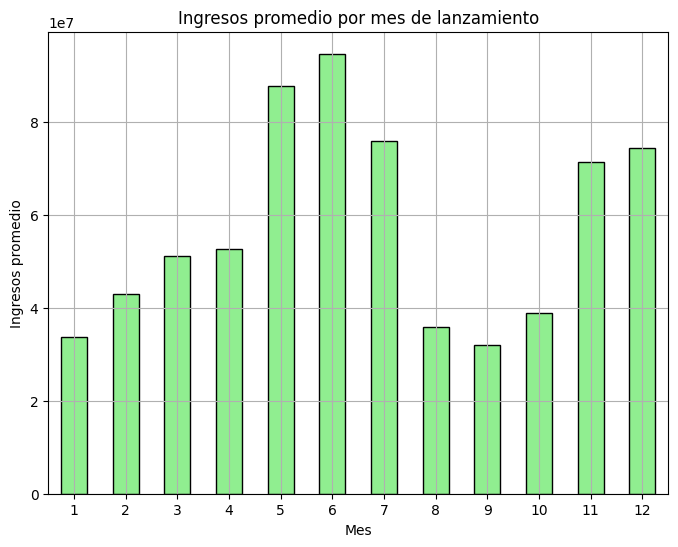

En Junio se han visto los lanzamientos con mejores ingresos.
El promedio de películas lanzadas por mes es: 833.33


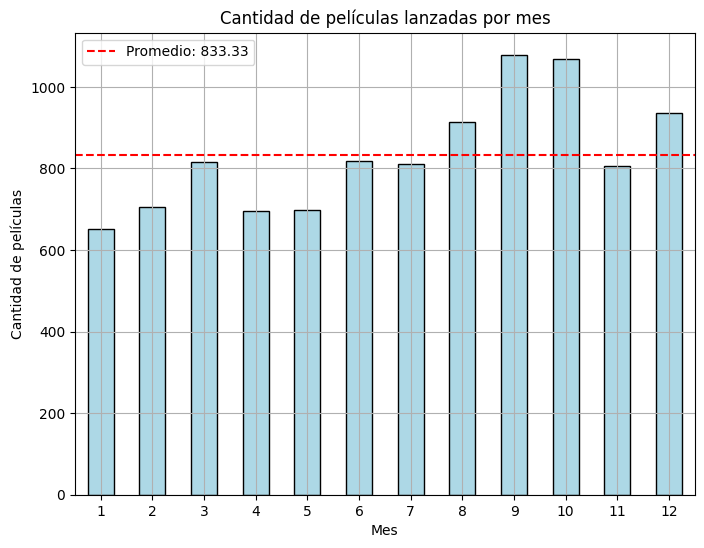

In [25]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')
datos['releaseMonth'] = datos['releaseDate'].dt.month
ingresos_por_mes = datos.groupby('releaseMonth')['revenue'].mean()

print("Ingresos promedio por mes:\n", ingresos_por_mes)

# Gráfico de ingresos promedio por mes
plt.figure(figsize=(8, 6))
ingresos_por_mes.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Ingresos promedio por mes de lanzamiento')
plt.xlabel('Mes')
plt.ylabel('Ingresos promedio')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
print("En Junio se han visto los lanzamientos con mejores ingresos.")



datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')
datos['releaseMonth'] = datos['releaseDate'].dt.month
peliculas_por_mes = datos.groupby('releaseMonth').size()
promedio_peliculas_por_mes = peliculas_por_mes.mean()
print(f'El promedio de películas lanzadas por mes es: {promedio_peliculas_por_mes:.2f}')

# Gráfico de la cantidad de películas lanzadas por mes
plt.figure(figsize=(8, 6))
peliculas_por_mes.plot(kind='bar', color='lightblue', edgecolor='black')
plt.axhline(promedio_peliculas_por_mes, color='red', linestyle='--', label=f'Promedio: {promedio_peliculas_por_mes:.2f}')
plt.title('Cantidad de películas lanzadas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()




# 14. ¿Cómo se correlacionan las calificaciones con el éxito comercial? #

La correlación entre el promedio de votos y los ingresos es: 0.1413
por lo tanto el promedio de votos no parece influir en las ganancias de la pelicula.


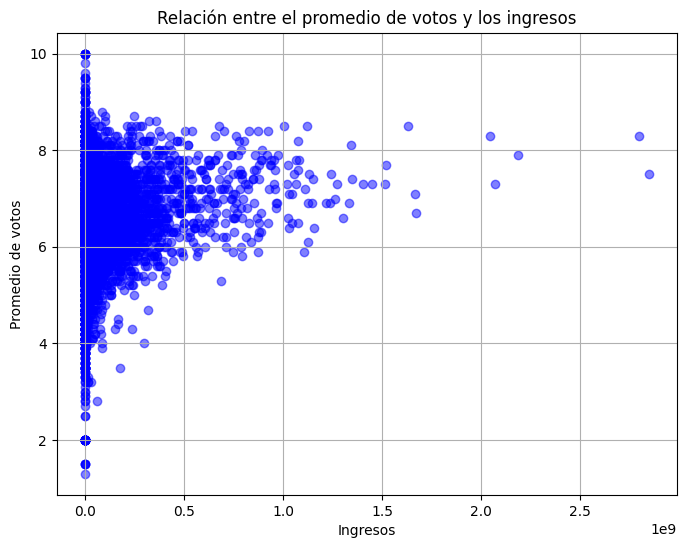

La correlación entre el total de votos y los ingresos es: 0.7683
por lo tanto el total de votos influye ligeramente en las ganancias de la pelicula.


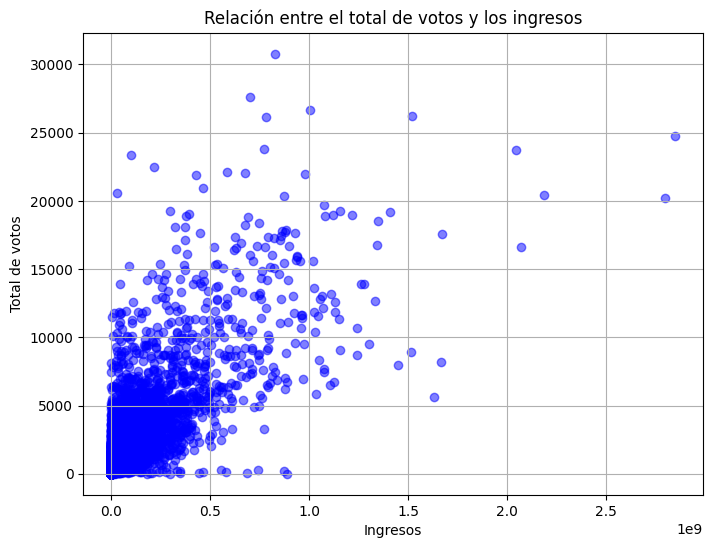

In [7]:
correlacion = datos[['revenue', 'voteAvg']].corr().iloc[0, 1]

print(f'La correlación entre el promedio de votos y los ingresos es: {correlacion:.4f}')
print("por lo tanto el promedio de votos no parece influir en las ganancias de la pelicula.")

plt.figure(figsize=(8, 6))
plt.scatter(datos['revenue'], datos['voteAvg'], alpha=0.5, color='blue')
plt.title('Relación entre el promedio de votos y los ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Promedio de votos')
plt.grid(True)
plt.show()

correlacion = datos[['revenue', 'voteCount']].corr().iloc[0, 1]

print(f'La correlación entre el total de votos y los ingresos es: {correlacion:.4f}')
print("por lo tanto el total de votos influye ligeramente en las ganancias de la pelicula.")

plt.figure(figsize=(8, 6))
plt.scatter(datos['revenue'], datos['voteCount'], alpha=0.5, color='blue')
plt.title('Relación entre el total de votos y los ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Total de votos')
plt.grid(True)
plt.show()

# 15. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla? #

La correlación entre la popularidad del elenco y los ingresos es: -0.0005
por lo tanto la popularidad del elenco no parece influir en las ganancias de la pelicula.


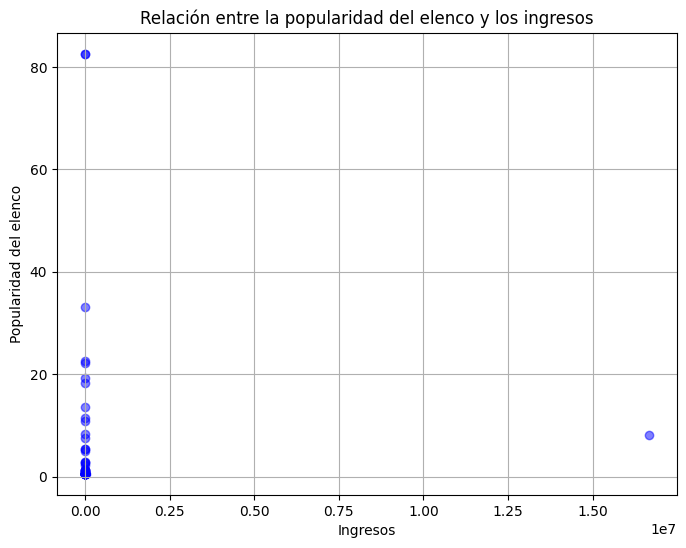

In [19]:
correlacion = datos[['revenue', 'actorsPopularity']].corr().iloc[0, 1]

print(f'La correlación entre la popularidad del elenco y los ingresos es: {correlacion:.4f}')
print("por lo tanto la popularidad del elenco no se encuentra relacionada con las ganancias de la pelicula.")

plt.figure(figsize=(8, 6))
plt.scatter(datos['revenue'], datos['actorsPopularity'], alpha=0.5, color='blue')
plt.title('Relación entre la popularidad del elenco y los ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Popularidad del elenco')
plt.grid(True)
plt.show()

# 16. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados? #

Conteo de películas con y sin videos promocionales:
video
False    9430
True      570
Name: count, dtype: int64

Promedio de ingresos:
video
False    5.034359e+07
True     1.625249e+08
Name: revenue, dtype: float64
A pesar de ser considerablemente menor el numero de peliculas con video estas prueban tener un promedio de ingresos mayor comparado con las que no lo tienen.


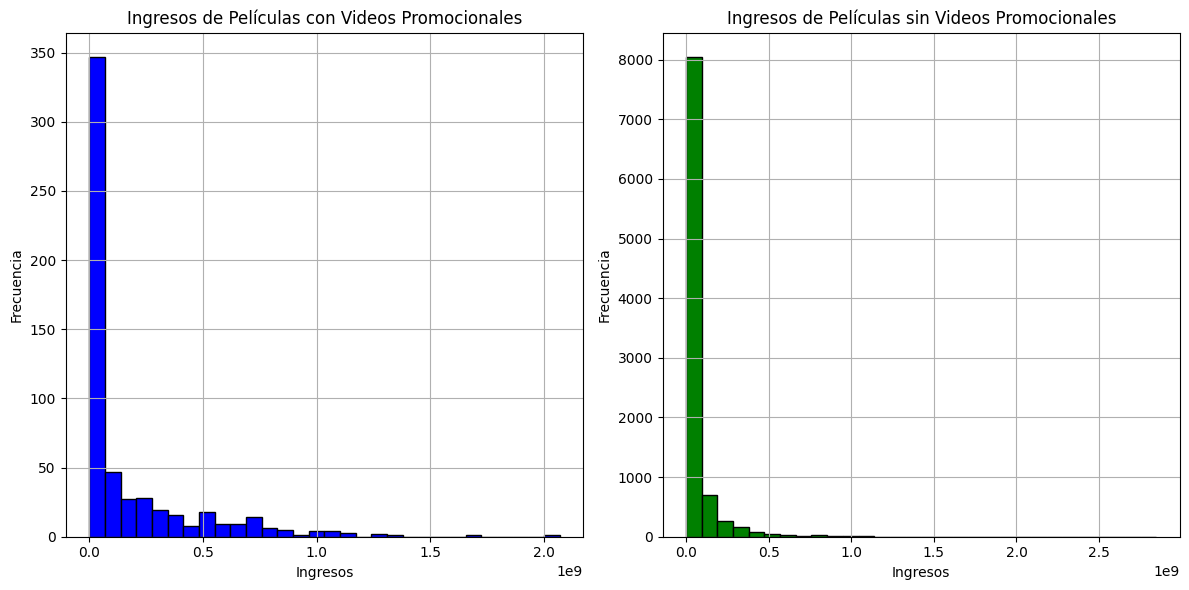

In [11]:
# Asegurarse de que la columna 'video' sea booleana
datos['video'] = datos['video'].astype(bool)


# Calcular el promedio de ingresos para películas con y sin videos promocionales

conteo_videos = datos['video'].value_counts()
print("Conteo de películas con y sin videos promocionales:")
print(conteo_videos)

promedio_revenue = datos.groupby('video')['revenue'].mean()
print("\nPromedio de ingresos:")
print(promedio_revenue)

print("A pesar de ser considerablemente menor el numero de peliculas con video estas prueban tener un promedio de ingresos mayor comparado con las que no lo tienen.")

# Crear histogramas del revenue
plt.figure(figsize=(12, 6))

# Histograma para películas con videos promocionales
plt.subplot(1, 2, 1)
datos[datos['video'] == True]['revenue'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Ingresos de Películas con Videos Promocionales')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

# Histograma para películas sin videos promocionales
plt.subplot(1, 2, 2)
datos[datos['video'] == False]['revenue'].hist(bins=30, color='green', edgecolor='black')
plt.title('Ingresos de Películas sin Videos Promocionales')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 17. ¿Cómo se correlacionan el presupuesto e ingresos de las peliculas con videos promocionales comparado con las que no lo tienen? #


Índice de correlación entre Ingresos y Presupuesto:
Con Video Promocional: 0.814086052770159
Sin Video Promocional: 0.7378851800533281
Para las peliculas con video el presupuesto parece influir mas en los ingresos comparado al indice de todas las peliculas, mientras que para las de sin video el cambio en el indice es minimo.


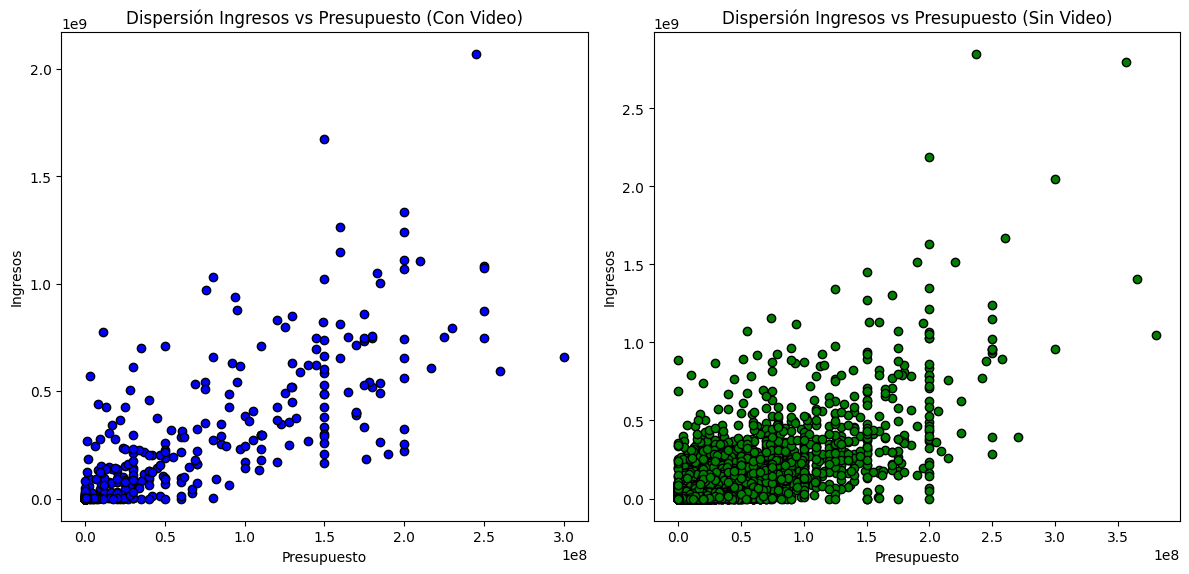

In [13]:
# Cálculo del índice de correlación entre ingresos y presupuesto
correlacion_con_video = datos[datos['video'] == True][['revenue', 'budget']].corr().loc['revenue', 'budget']
correlacion_sin_video = datos[datos['video'] == False][['revenue', 'budget']].corr().loc['revenue', 'budget']

print("\nÍndice de correlación entre Ingresos y Presupuesto:")
print(f"Con Video Promocional: {correlacion_con_video}")
print(f"Sin Video Promocional: {correlacion_sin_video}")

print("Para las peliculas con video el presupuesto parece influir mas en los ingresos comparado al indice de todas las peliculas, mientras que para las de sin video el cambio en el indice es minimo.")

# Gráficos de dispersión de ingresos vs presupuesto
plt.figure(figsize=(12, 6))

# Dispersión para películas con videos promocionales
plt.subplot(1, 2, 1)
plt.scatter(datos[datos['video'] == True]['budget'], datos[datos['video'] == True]['revenue'], color='blue', edgecolor='black')
plt.title('Dispersión Ingresos vs Presupuesto (Con Video)')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')

# Dispersión para películas sin videos promocionales
plt.subplot(1, 2, 2)
plt.scatter(datos[datos['video'] == False]['budget'], datos[datos['video'] == False]['revenue'], color='green', edgecolor='black')
plt.title('Dispersión Ingresos vs Presupuesto (Sin Video)')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')

plt.tight_layout()
plt.show()

# 18. ¿Cómo se compara el presupuesto de las peliculas que tienen videos promocionales con aquellas que no lo tienen? #


Promedio de presupuesto:
video
False    1.723424e+07
True     4.034643e+07
Name: budget, dtype: float64
Las peliculas con video al igual que con los ingresos muestran tener un mayor presupuesto en promedio a pesar de ser un numero considerablemente menor de peliculas.


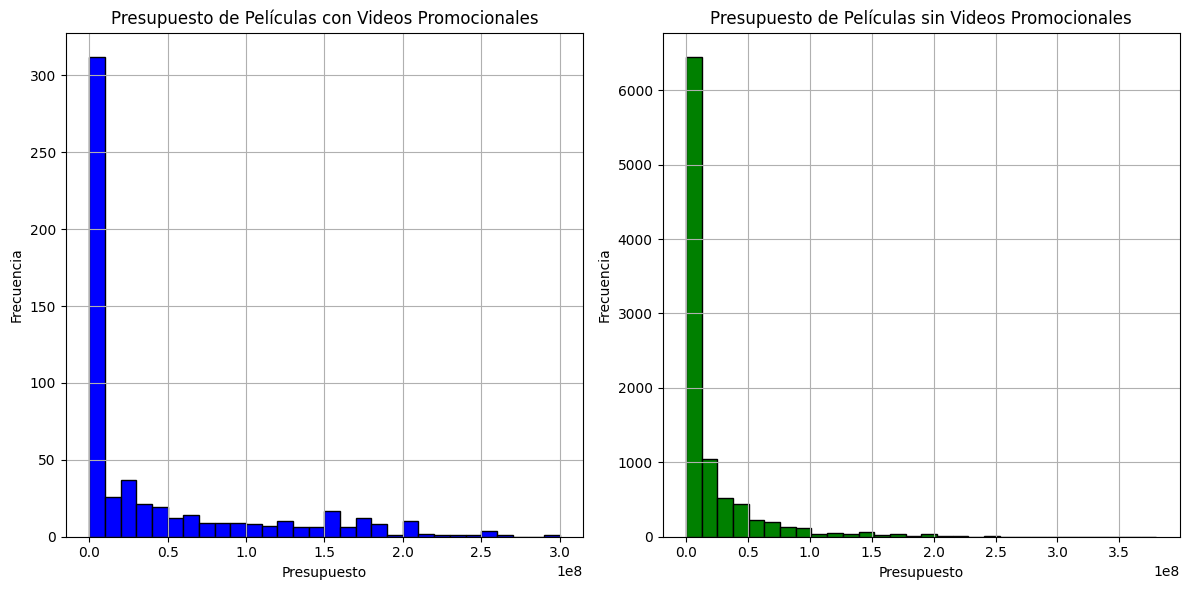

In [15]:
# Asegurarse de que la columna 'video' sea booleana
datos['video'] = datos['video'].astype(bool)


# Calcular el promedio de presupuesto para películas con y sin videos promocionales

promedio_budget = datos.groupby('video')['budget'].mean()
print("\nPromedio de presupuesto:")
print(promedio_budget)

print("Las peliculas con video al igual que con los ingresos muestran tener un mayor presupuesto en promedio a pesar de ser un numero considerablemente menor de peliculas.")

# Crear histogramas del presupuesto
plt.figure(figsize=(12, 6))

# Histograma para películas con videos promocionales
plt.subplot(1, 2, 1)
datos[datos['video'] == True]['budget'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Presupuesto de Películas con Videos Promocionales')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')

# Histograma para películas sin videos promocionales
plt.subplot(1, 2, 2)
datos[datos['video'] == False]['budget'].hist(bins=30, color='green', edgecolor='black')
plt.title('Presupuesto de Películas sin Videos Promocionales')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 19. ¿Cómo ha cambiado el presupuesto e ingresos de las peliculas con el paso de los años, ha aumentado o disminuido? #

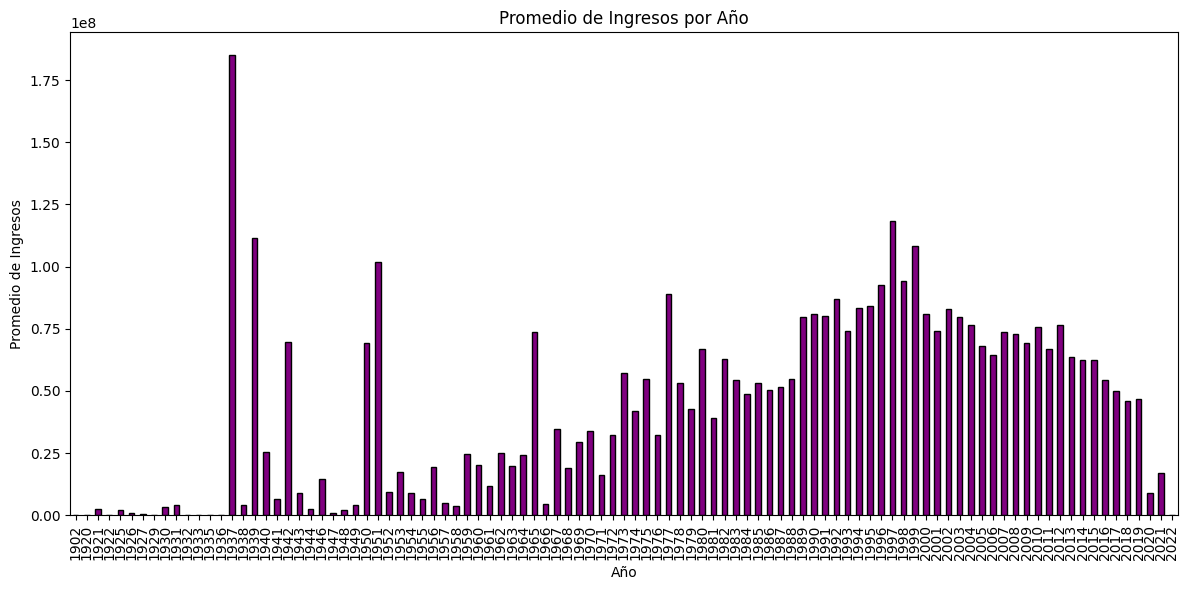

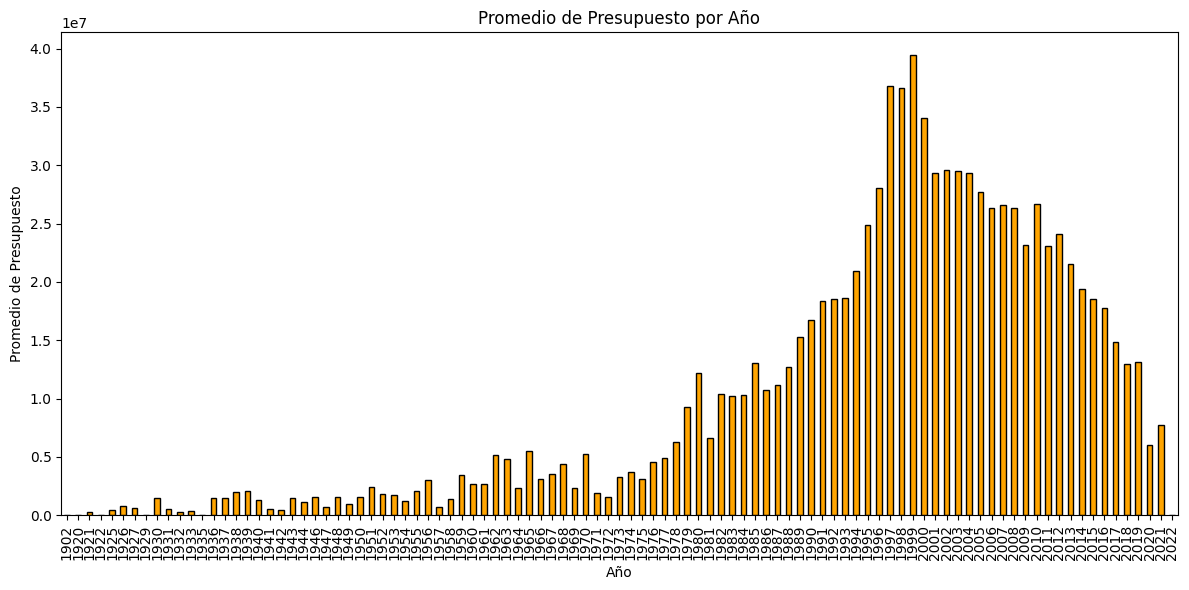

In [9]:
# Diagramas de barras para promedio de ingresos y presupuesto por año
if 'releaseDate' in datos.columns:
    datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')
    datos['year'] = datos['releaseDate'].dt.year

    # Promedio de ingresos por año
    promedio_ingresos_anio = datos.groupby('year')['revenue'].mean()
    
    plt.figure(figsize=(12, 6))
    promedio_ingresos_anio.plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Promedio de Ingresos por Año')
    plt.xlabel('Año')
    plt.ylabel('Promedio de Ingresos')
    plt.tight_layout()
    plt.show()

    # Promedio de presupuesto por año
    promedio_presupuesto_anio = datos.groupby('year')['budget'].mean()
    
    plt.figure(figsize=(12, 6))
    promedio_presupuesto_anio.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Promedio de Presupuesto por Año')
    plt.xlabel('Año')
    plt.ylabel('Promedio de Presupuesto')
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'release_date' no se encuentra en el conjunto de datos.")

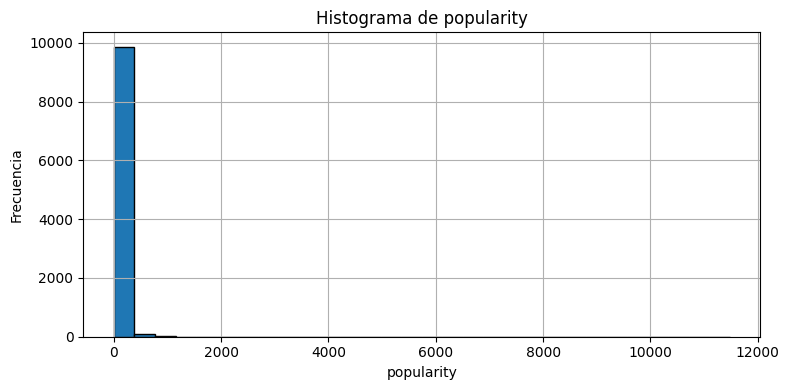

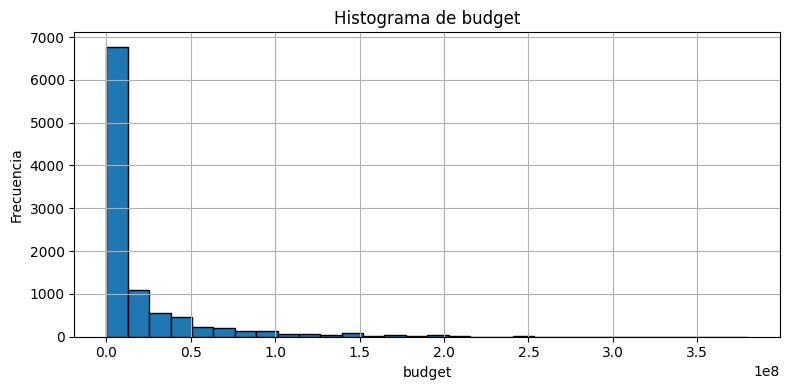

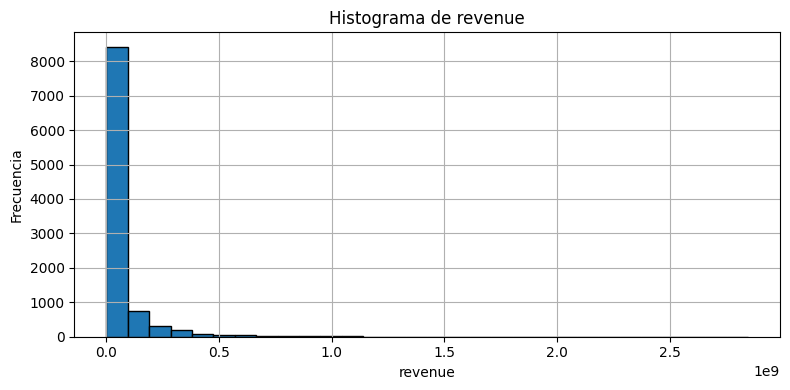

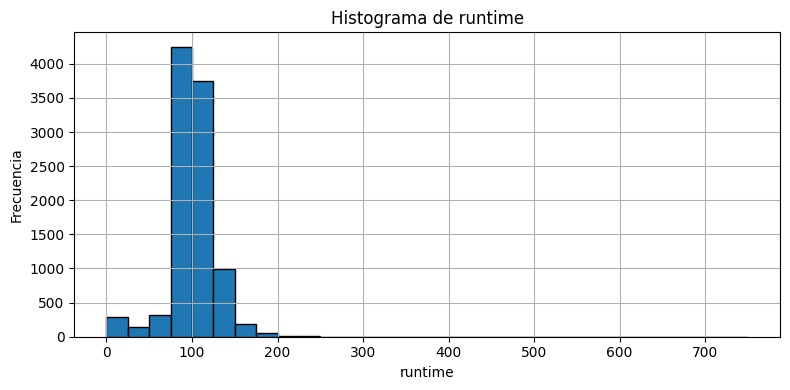

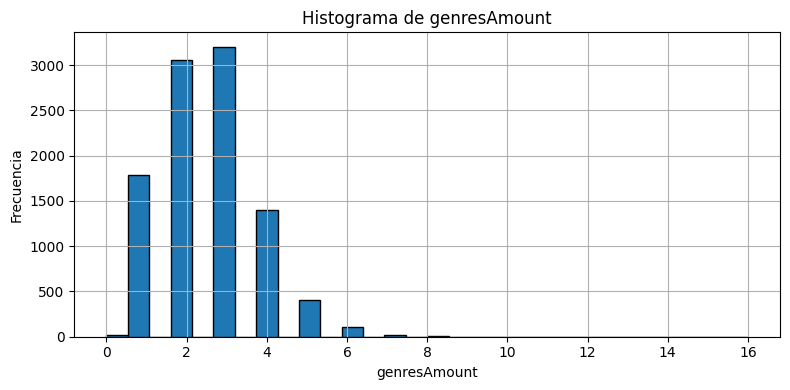

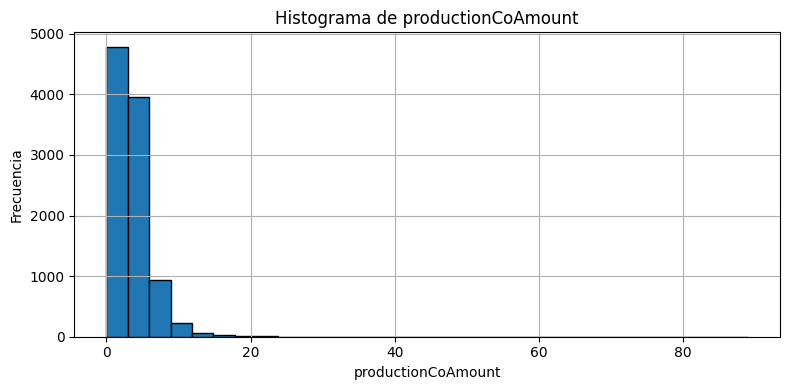

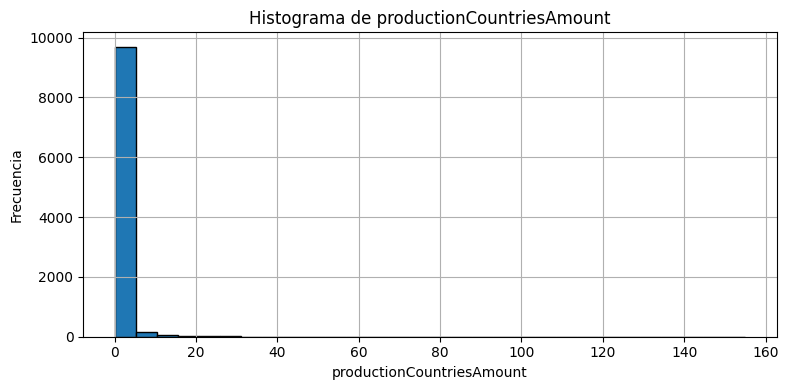

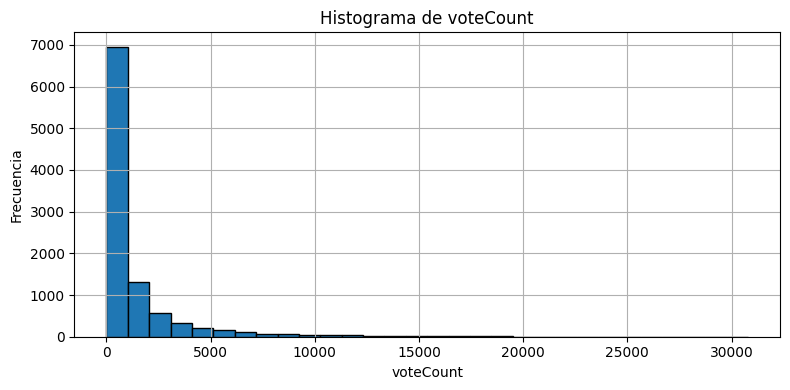

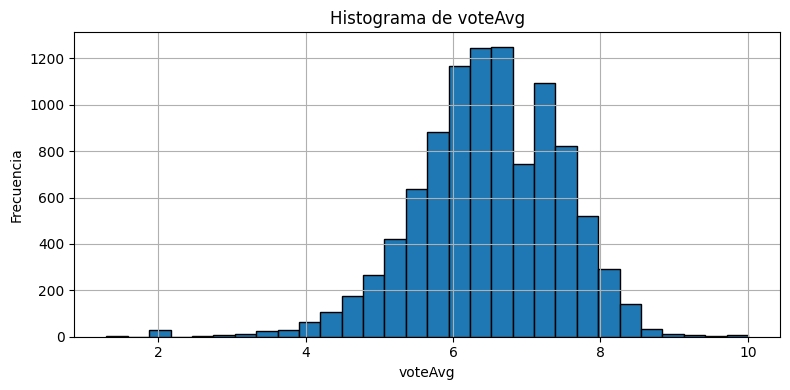

In [12]:
# Histogramas de variables especificadas
variables_histogramas = ['popularity', 'budget', 'revenue', 'runtime', 'genresAmount', 
                         'productionCoAmount', 'productionCountriesAmount', 'voteCount', 
                         'voteAvg']

for var in variables_histogramas:
    if var in datos.columns:
        plt.figure(figsize=(8, 4))
        datos[var].hist(bins=30, edgecolor='black')
        plt.title(f'Histograma de {var}')
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna '{var}' no se encuentra en el conjunto de datos.")
